In [30]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [31]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [32]:
train_data, test_data = imdb['train'], imdb['test']


In [33]:
for s,l in train_data:
  print(s.numpy().decode('utf8'))
  print(l.numpy())
  break


This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0


In [34]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []


In [35]:
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())


In [36]:
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())


In [37]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [11]:
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = ""


In [38]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

In [39]:
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index


In [ ]:
word_index

In [41]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


In [42]:
padded[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,   11,   26,   75,
        571,    6,  805, 2354,  313,  106,   19,   12,    7,  629,  686,
          6,    4, 2219,    5,  181,  584,   64, 1454,  110, 2263,    3,
       3951,   21,    2,    1,    3,  258,   41, 4677,    4,  174,  188,
         21,   12, 4078,   11, 1578, 2354,   86,    2,   20,   14, 1907,
          2,  112,  940,   14, 1811, 1340,  548,    3,  355,  181,  466,
          6,  591,   19,   17,   55, 1817,    5,   49,   14, 4044,   96,
         40,  136,   11,  972,   11,  201,   26, 1046,  171,    5,    2,
         20,   19,   11,  294,    2, 2155,    5,   10,    3,  283,   41,
        466,    6,  591,    5,   92,  203,    1,  207,   99,  145, 4382,
         16,  230,  332,   11, 2486,  384,   12,   20,   31,   30],
      dtype=int32)

In [43]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [44]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


In [45]:
embedding_dim = 16
dense_dim = 6

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model_flatten.summary()

NUM_EPOCHS = 10
BATCH_SIZE = 128


history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))


plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_9 (Bidirectio  (None, 120, 64)          12544     
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_18 (Dense)            (None, 6)                 390       
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 197,773
Trainable params: 197,773
Non-tr

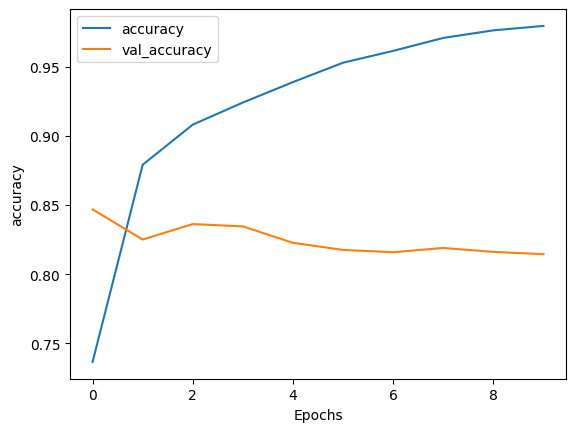

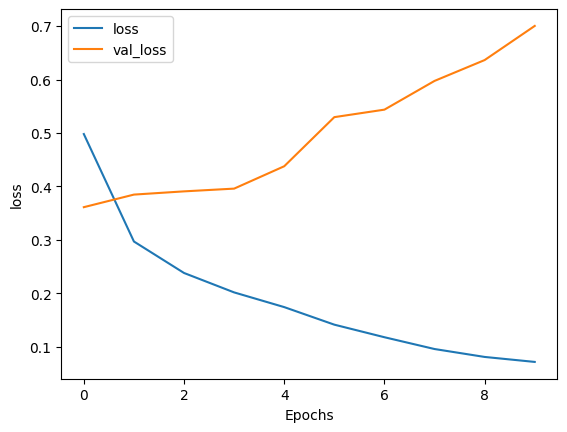

In [48]:

embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim, return_sequences =True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model_lstm.summary()

NUM_EPOCHS = 10
BATCH_SIZE = 128


history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))


plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_11 (Bidirecti  (None, 64)               9600      
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 6)                 390       
                                                                 
 dense_21 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 30s 135ms/step - loss: 0.6330 - accuracy: 0.6149 - val_loss

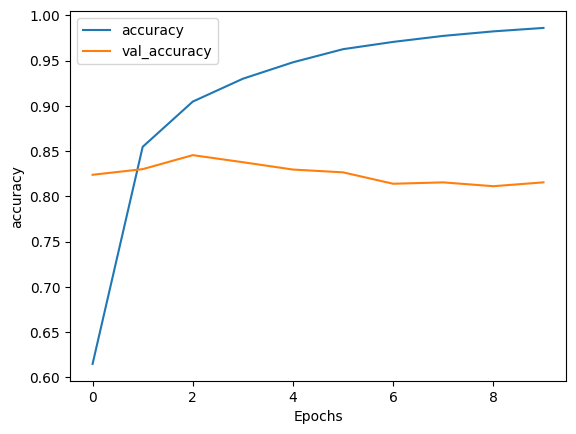

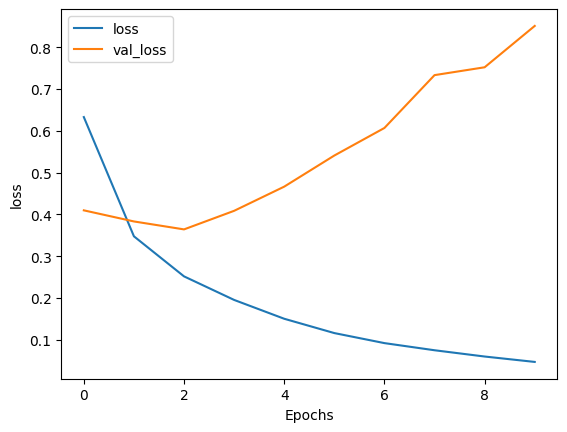

In [49]:

embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model_gru.summary()

NUM_EPOCHS = 10
BATCH_SIZE = 128


history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))


plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_22 (Dense)            (None, 6)                 774       
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_______________________________________________

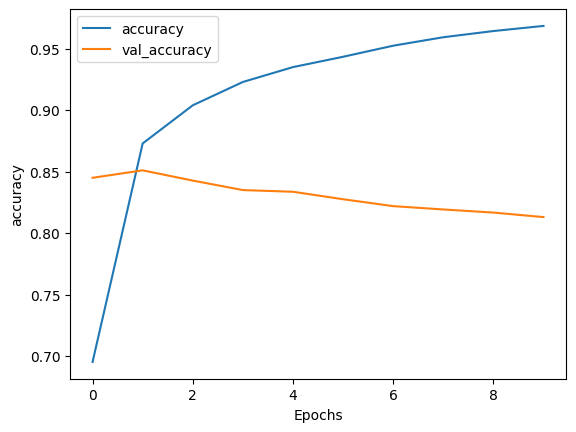

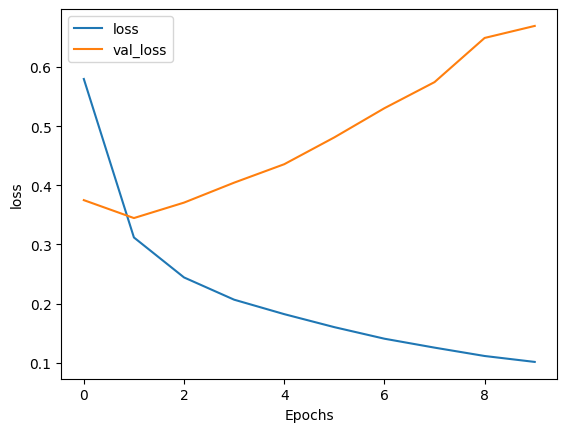

In [50]:

embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model_conv.summary()

NUM_EPOCHS = 10
BATCH_SIZE = 128


history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

